In [1]:
#%%
from osgeo import gdal
import rasterio
from rasterio import features
import os
from glob import glob
from rasterio.merge import merge
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# import utils
# import util_preprocess

In [2]:
target = 'class'

# Random seed
# The random seed
random_seed = 42

# Set random seed in numpy
np.random.seed(random_seed)

### Preparing contextual features 

In [3]:
User_Defined_List = ['D:/mongolia/GITHUB/features_full/fourier_sub/fourier_sc10_mean.tif',
                    'D:/mongolia/GITHUB/features_full/fourier_sub/fourier_sc20_mean.tif',
                    'D:/mongolia/GITHUB/features_full/fourier_sub/fourier_sc40_mean.tif',
                    'D:/mongolia/GITHUB/features_full/fourier_sub/fourier_sc200_mean.tif',
                    'D:/mongolia/GITHUB/features_full/gabor_sub/gabor_sc40_mean.tif',
                    'D:/mongolia/GITHUB/features_full/hog_sub/hog_sc10_max.tif',
                    'D:/mongolia/GITHUB/features_full/hog_sub/hog_sc40_variance.tif',
                    'D:/mongolia/GITHUB/features_full/mean_sub/mean_sc10_mean.tif',
                    'D:/mongolia/GITHUB/features_full/mean_sub/mean_sc20_mean.tif',
                    'D:/mongolia/GITHUB/features_full/mean_sub/mean_sc20_variance.tif',
                    'D:/mongolia/GITHUB/features_full/mean_sub/mean_sc40_variance.tif',
                    'D:/mongolia/GITHUB/features_full/lsr_sub/lsr_sc40_line_length.tif',
                    'D:/mongolia/GITHUB/features_full/lsr_sub/lsr_sc40_line_mean.tif',
                    'D:/mongolia/GITHUB/features_full/lsr_sub/lsr_sc200_line_mean.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc10_kurtosis.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc20_kurtosis.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc10_max.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc20_max.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc40_max.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc40_skew.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc20_variance.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc40_variance.tif',
                    'D:/mongolia/GITHUB/features_full/lbpm_sub/lbpm_sc200_max.tif',
                    'D:/mongolia/GITHUB/features_full/orb_sub/orb_sc40_variance.tif',
                    'D:/mongolia/GITHUB/features_full/orb_sub/orb_sc40_mean.tif',
                    'D:/mongolia/GITHUB/features_full/orb_sub/orb_sc10_kurtosis.tif',
                    'D:/mongolia/GITHUB/features_full/orb_sub/orb_sc200_variance.tif',]

In [4]:
# Load contextueal features 

outfile = 'D:/mongolia/GITHUB/'

# vrt_options = gdal.BuildVRTOptions(separate=True)
# vrt =  gdal.BuildVRT(f'{outfile}/spfea_27.vrt', User_Defined_List, options=vrt_options)
# vrt = None

# Load stacked data VRT 
PATH= f'{outfile}/spfea_27.vrt'

img = rasterio.open(PATH)
img_arr = img.read()
print(img_arr.shape)

# Process spfea features, get the width, height and number of bands
n = img_arr.shape[0]
print (n) # number of bands
h = img_arr.shape[1]
print (h) # height
w = img_arr.shape[2]
print (w) # width

(27, 2380, 2490)
27
2380
2490


In [5]:
bandname = []
    # loop from input 
for file in User_Defined_List:
    head, tail = os.path.split(file)
    col_names=tail[:-4]
    bandname.append(col_names)
print(bandname)

['fourier_sc10_mean', 'fourier_sc20_mean', 'fourier_sc40_mean', 'fourier_sc200_mean', 'gabor_sc40_mean', 'hog_sc10_max', 'hog_sc40_variance', 'mean_sc10_mean', 'mean_sc20_mean', 'mean_sc20_variance', 'mean_sc40_variance', 'lsr_sc40_line_length', 'lsr_sc40_line_mean', 'lsr_sc200_line_mean', 'lbpm_sc10_kurtosis', 'lbpm_sc20_kurtosis', 'lbpm_sc10_max', 'lbpm_sc20_max', 'lbpm_sc40_max', 'lbpm_sc40_skew', 'lbpm_sc20_variance', 'lbpm_sc40_variance', 'lbpm_sc200_max', 'orb_sc40_variance', 'orb_sc40_mean', 'orb_sc10_kurtosis', 'orb_sc200_variance']


In [6]:
data_array = img_arr[:, img_arr[0,...]!=-9999]
data_array= np.transpose(data_array)
data_df = pd.DataFrame(data_array, columns=bandname)
print(data_df.shape)

(5926200, 27)


<AxesSubplot: >

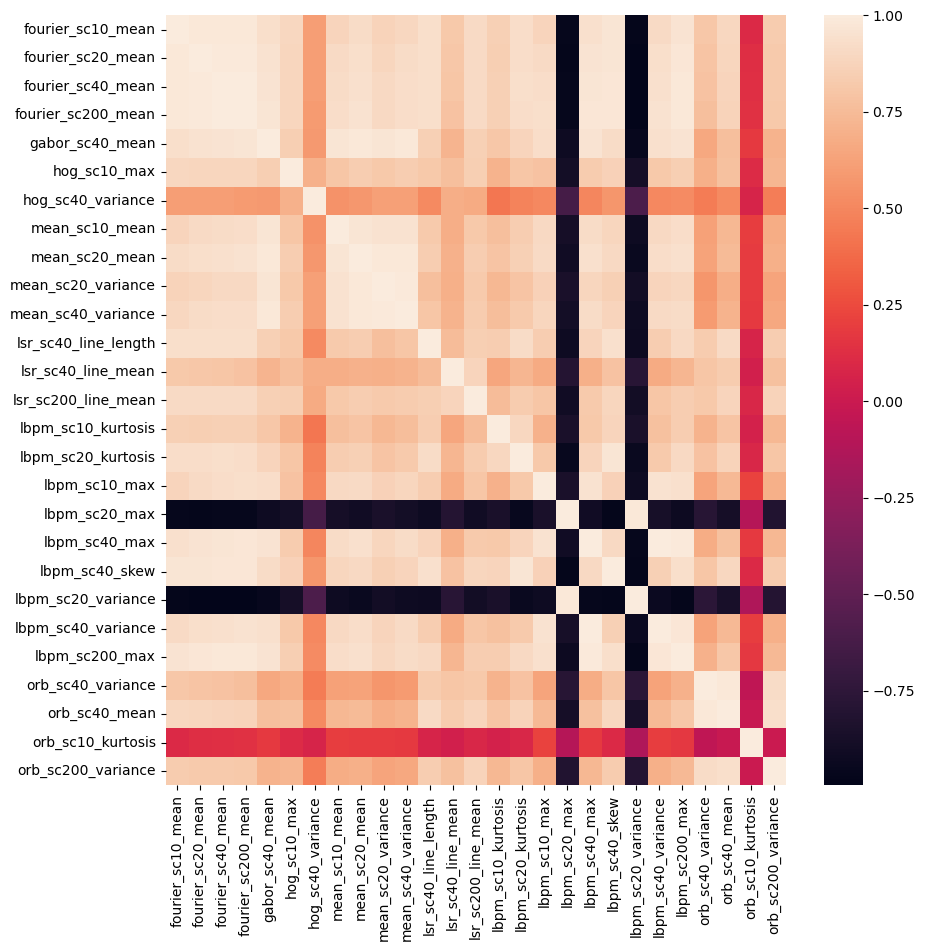

In [7]:
fig, ax = plt.subplots(figsize= (10,10),sharey=True)

sns.heatmap(data_df.corr())

In [10]:
fp = 'D:/mongolia/GITHUB/Naiman_Raster_Trainset/Naiman_Raster.tif'
train_img = rasterio.open(fp)
train_array = train_img.read()
print(train_array.shape)

(1, 2380, 2490)


In [13]:
# Cncatenate Data and Trainset
data = np.concatenate((train_array, img_arr), axis=0)
data.shape

(28, 2380, 2490)

In [22]:
names = [target] + bandname
data_arr = data.flatten()
data_arr.shape
# df_train = pd.DataFrame(data_arr, columns=names)

(165933600,)

In [30]:
data_arr = data[:, data[0,...]!=-9999]
data_arr = data[:, data[0,...]!=0]
data_arr= np.transpose(data_arr)
df_full = pd.DataFrame(data_arr, columns=names)

In [31]:
df_full.head(20)

,class,fourier_sc10_mean,fourier_sc20_mean,fourier_sc40_mean,fourier_sc200_mean,gabor_sc40_mean,hog_sc10_max,hog_sc40_variance,mean_sc10_mean,mean_sc20_mean,...,lbpm_sc20_max,lbpm_sc40_max,lbpm_sc40_skew,lbpm_sc20_variance,lbpm_sc40_variance,lbpm_sc200_max,orb_sc40_variance,orb_sc40_mean,orb_sc10_kurtosis,orb_sc200_variance
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,400.000000,0.0,0.000000,7855.062500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,400.000000,0.0,0.000000,7855.062500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,400.000000,0.0,0.000000,7855.062500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,400.000000,0.0,0.000000,7855.062500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,400.000000,0.0,0.000000,7855.062500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,400.000000,0.0,0.000000,7855.062500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,400.000000,0.0,0.000000,7855.062500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,3.0,78.719200,96.469093,108.764198,141.149796,12.978794,0.157624,0.000408,73.642624,36.218590,...,230.926071,901.0,0.000014,1180.823608,18077.164062,23792.0,19.717747,2.571429,0.000000,9267.429688
8,3.0,75.468163,94.196968,106.862785,141.188812,13.083602,0.194792,0.000401,71.958504,37.915092,...,248.788742,959.0,0.000012,1402.332764,20555.294922,23851.0,9.373937,1.392857,0.000000,9081.399414
9,3.0,81.725685,96.840370,108.193993,141.348450,12.997427,0.146456,0.000266,69.196396,37.633308,...,235.900650,943.0,0.000013,1301.442871,19795.492188,23607.0,12.878222,1.964286,243.929901,9864.373047


In [11]:
# tr_name = ["class"]
# tr_img_data = train_array.flatten()
# df_train = pd.DataFrame(tr_img_data, columns=tr_name)
# df_train.head()
# df_train['class'].unique()

array([0, 1, 3, 2, 7, 8, 6, 5, 4], dtype=uint8)

In [14]:
# # concat trainset and data
# data_concat = pd.concat([df_train, data_df], axis=1)
# print (data_concat.shape)
# data_concat = data_concat.dropna(axis=0)

(5926200, 28)


In [15]:
# df_full = data_concat.loc[data_concat['class'] != 0 ]
# print(df_full.shape)
# df_full['class']=df_full['class'].astype(int)
# df_full['class'].unique()

(26886, 28)


C:\Users\mowus\AppData\Local\Temp\ipykernel_11252\2764323844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['class']=df_full['class'].astype(int)


array([1, 3, 2, 7, 8, 6, 5, 4])

In [41]:
df_full.head(40)

def reclass(row):
    reclass = row['class']
    if reclass == 1: return 0
    if reclass == 2: return 1
    if reclass == 3: return 2
    if reclass == 4: return 3
    if reclass == 5: return 4
    if reclass == 6: return 5
    if reclass == 7: return 6
    if reclass == 8: return 7
    return reclass
df_full['class'] = df_full.apply(reclass, axis=1)

<AxesSubplot: xlabel='class', ylabel='Count'>

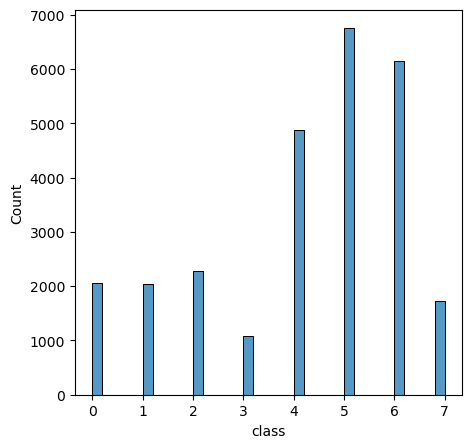

In [42]:
# Plot traning clsss frequency
fig, ax = plt.subplots(figsize= (5,5),sharey=True)
sns.histplot(data=df_full, x=df_full['class'])

## Prepare for modelling

In [61]:
# Divide the training data into training (80%) and testing (20%)
df_train, df_test = train_test_split(df_full, train_size=0.60, random_state=random_seed)
# Reset the index
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.60, random_state=random_seed)
# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

print('df_train', df_train.shape)
print('df_val', df_val.shape)
print('df_test', df_test.shape)

df_train (9699, 28)
df_val (6467, 28)
df_test (10778, 28)


In [62]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [63]:
# The StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.fit_transform(X_val)

# Standardize the test data
X_test = ss.fit_transform(X_test)

In [64]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_val = le.fit_transform(y_val)

In [65]:
# import XGBClassifier
from xgboost import XGBClassifier

params = {'objective': 'multi:softmax',
          'n_estimators': 100,
        #   'scale_pos_weight': 2,
          'early_stopping_rounds': 10,
          'eval_metric':'mlogloss',
        #   'min_child_weight':5,
        #   'subsample': 0.5,
        #   'colsample_bytree':0.5,
          'max_depth' : 5,
          'gamma':0.05
         }

model = XGBClassifier(**params, validate_parameters=True, random_state=random_seed)
model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_val, y_val)])

[0]	validation_0-mlogloss:1.28909	validation_1-mlogloss:1.31971
[1]	validation_0-mlogloss:0.96960	validation_1-mlogloss:1.01694
[2]	validation_0-mlogloss:0.76780	validation_1-mlogloss:0.82422
[3]	validation_0-mlogloss:0.62409	validation_1-mlogloss:0.68867
[4]	validation_0-mlogloss:0.51909	validation_1-mlogloss:0.58913
[5]	validation_0-mlogloss:0.44007	validation_1-mlogloss:0.51432
[6]	validation_0-mlogloss:0.37746	validation_1-mlogloss:0.45555
[7]	validation_0-mlogloss:0.32891	validation_1-mlogloss:0.41051
[8]	validation_0-mlogloss:0.28862	validation_1-mlogloss:0.37210
[9]	validation_0-mlogloss:0.25663	validation_1-mlogloss:0.34236
[10]	validation_0-mlogloss:0.22960	validation_1-mlogloss:0.31668
[11]	validation_0-mlogloss:0.20916	validation_1-mlogloss:0.29822
[12]	validation_0-mlogloss:0.19184	validation_1-mlogloss:0.28303
[13]	validation_0-mlogloss:0.17685	validation_1-mlogloss:0.26964
[14]	validation_0-mlogloss:0.16405	validation_1-mlogloss:0.25758
[15]	validation_0-mlogloss:0.15199	

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0.05, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', ...)

F1: [0.9956770885694178]
Recall: [0.993878575012544]
Precision: [0.9974821230738241]


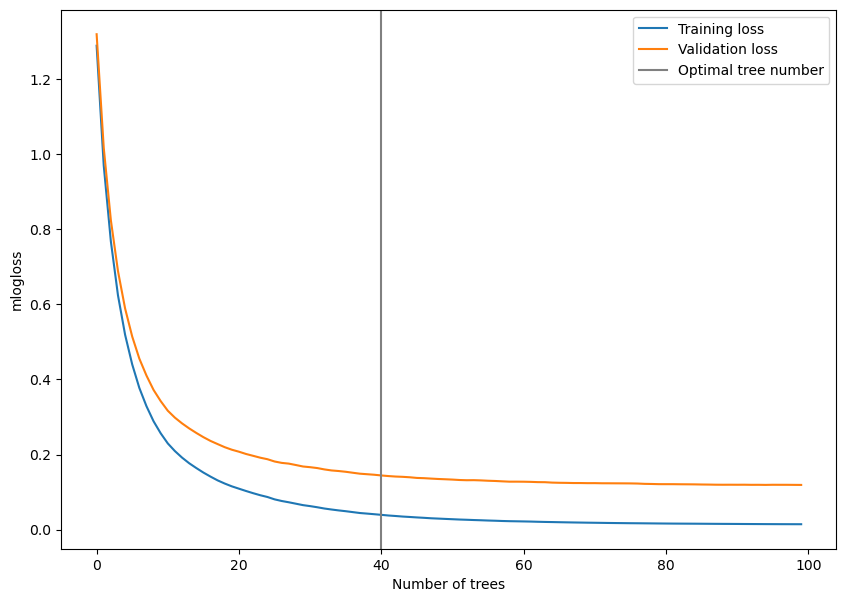

In [74]:
from catboost.utils import eval_metric
# import CatBoost

# predictions = model.predict(X_test, output_margin=True)
predictions = model.predict(X_test, output_margin=False)
# best_iteration = model.get_booster().best_ntree_limit
# predict(X_test, ntree_limit=best_iteration)

F1 = eval_metric(y_test, predictions, 'F1')
Precision = eval_metric(y_test, predictions, 'Precision')
Recall = eval_metric(y_test, predictions, 'Recall')
print("F1:", F1)
print("Recall:", Recall)
print("Precision:", Precision)

from matplotlib import pyplot as plt
results = model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["mlogloss"], label="Training loss")
plt.plot(results["validation_1"]["mlogloss"], label="Validation loss")
plt.axvline(40, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("mlogloss")
plt.legend()

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


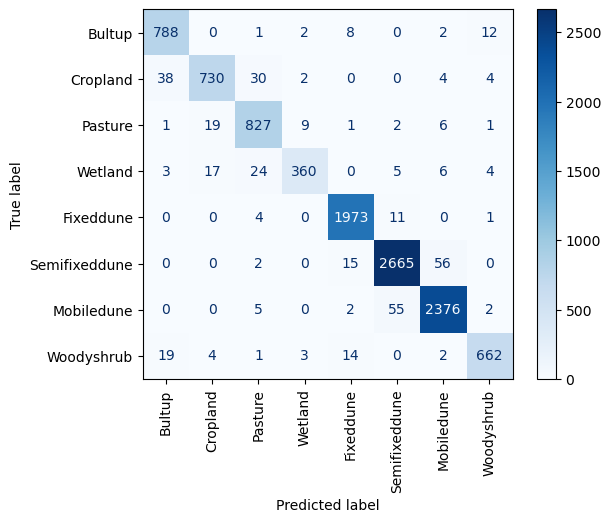

In [77]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
class_names = ['Bultup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub']
disp = plot_confusion_matrix(model, X_test, y_test, display_labels =class_names, cmap=plt.cm.Blues,xticks_rotation='vertical')

In [75]:
# from sklearn.metrics import classification_report, confusion_matrix


# print("=== Confusion Matrix ===")
# print(confusion_matrix(y_test, predictions))
# print('\n')
# print("=== Classification Report ===")
# print(classification_report(y_test, predictions))

=== Confusion Matrix ===
[[ 788    0    1    2    8    0    2   12]
 [  38  730   30    2    0    0    4    4]
 [   1   19  827    9    1    2    6    1]
 [   3   17   24  360    0    5    6    4]
 [   0    0    4    0 1973   11    0    1]
 [   0    0    2    0   15 2665   56    0]
 [   0    0    5    0    2   55 2376    2]
 [  19    4    1    3   14    0    2  662]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       813
           1       0.95      0.90      0.93       808
           2       0.93      0.95      0.94       866
           3       0.96      0.86      0.91       419
           4       0.98      0.99      0.99      1989
           5       0.97      0.97      0.97      2738
           6       0.97      0.97      0.97      2440
           7       0.97      0.94      0.95       705

    accuracy                           0.96     10778
   macro avg       0.96      0.95      0.95     10778
we

In [ ]:
# Save the model

## Explanable AI using SHAP

In [68]:
import shap 
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

In [89]:
df_test.head()

,class,fourier_sc10_mean,fourier_sc20_mean,fourier_sc40_mean,fourier_sc200_mean,gabor_sc40_mean,hog_sc10_max,hog_sc40_variance,mean_sc10_mean,mean_sc20_mean,...,lbpm_sc20_max,lbpm_sc40_max,lbpm_sc40_skew,lbpm_sc20_variance,lbpm_sc40_variance,lbpm_sc200_max,orb_sc40_variance,orb_sc40_mean,orb_sc10_kurtosis,orb_sc200_variance
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,400.000000,0.0,0.000000,7855.062500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,5,86.724434,107.109528,124.982933,144.899902,9.363646,0.301346,0.011254,44.079815,21.762817,...,183.952499,700.0,0.000017,909.757996,13593.559570,16034.0,103.336029,5.964286,71.066063,50145.785156
2,6,70.909668,106.841141,116.043282,143.930893,14.121222,0.300381,0.005820,79.070213,39.084221,...,245.661697,920.0,0.000011,1582.787109,20079.001953,21050.0,19.012484,1.392857,42407.312500,10563.249023
3,6,63.737061,108.925758,111.416458,137.584412,13.534490,0.214897,0.017238,77.563148,33.551891,...,185.832626,814.0,0.000016,1006.892883,15689.100586,19518.0,6.018927,1.071429,0.000000,5069.346191
4,0,106.323639,115.747673,127.684456,152.579697,9.367825,0.267562,0.002492,33.419094,23.957081,...,196.348465,792.0,0.000020,896.160339,13874.246094,22597.0,127.337349,7.500000,73.753609,53389.753906


In [92]:
df_shap = df_test.drop('class', axis=1)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_shap)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


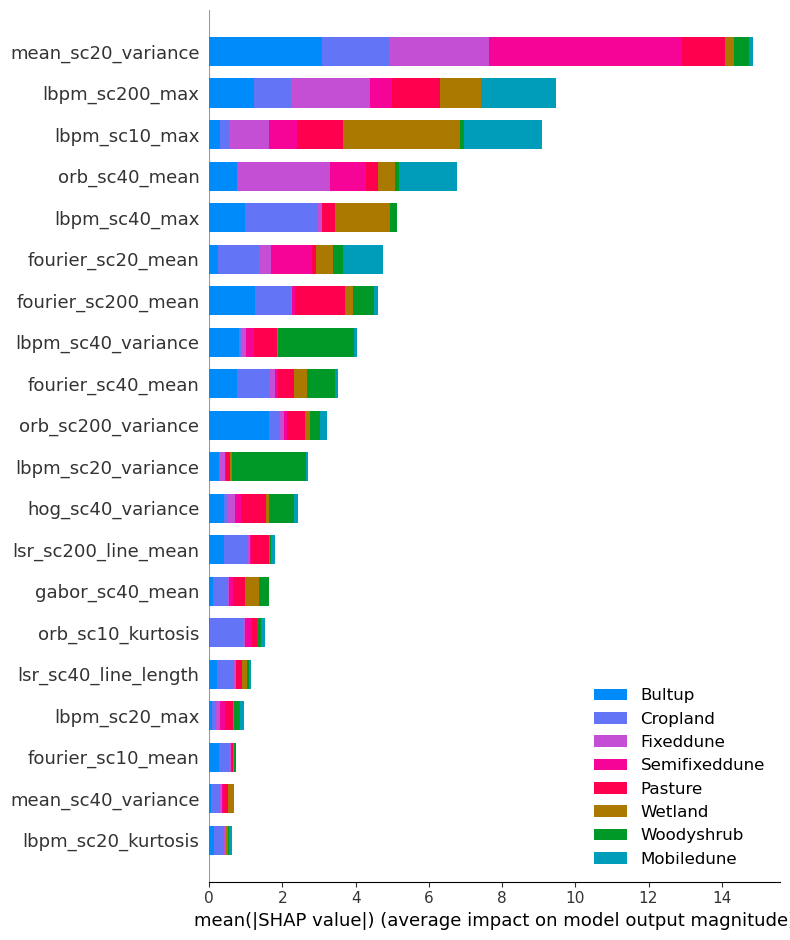

In [95]:
shap.summary_plot(shap_values, df_shap, plot_type="bar", class_names=class_names,  feature_names=df_shap.columns,  )

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


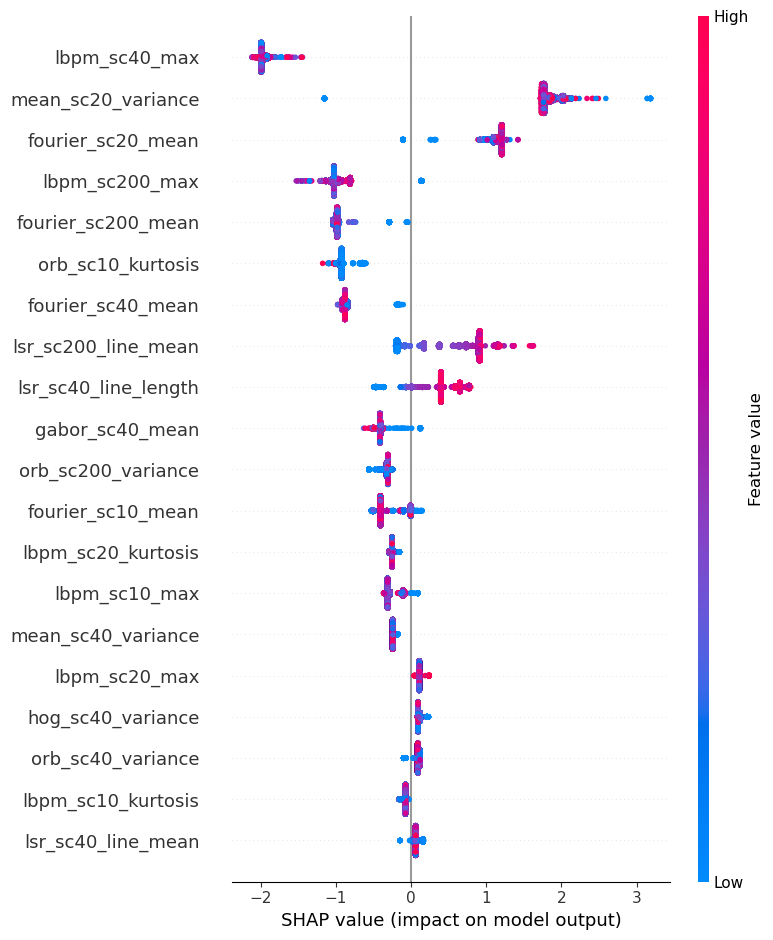

In [96]:
shap.summary_plot(shap_values[1], df_shap.values, feature_names=df_shap.columns)

In [97]:
# Shap Force Plot
i=8
shap.force_plot(explainer.expected_value[0], shap_values[0][i], df_shap.values[i], feature_names=df_shap.columns)